# Proof Of Work Mining

## 1) Importation de Librairie et Création de Fonction

In [1]:
#Importation des bibliothèques
import hashlib
from time import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### a) Proof of Work function

In [2]:
# Hash d'un block précédent et d'un nombre aléatoire
# Retourne un hash valide et son nonce
def PoW(previous_block,difficulty):
    #Initialisation à 0
    val_hash=previous_block
    nonce=1
    h=hashlib.sha256()
    h.update(previous_block.encode())
    h.update(str(nonce).encode())
    val_hash=h.hexdigest()
    # Hash en continue jusqu'à réussir la difficulté
    while val_hash[0:difficulty] != difficulty*"0":
        nonce+=1
        h=hashlib.sha256()
        h.update(previous_block.encode())
        h.update(str(nonce).encode())
        val_hash=h.hexdigest()
    return val_hash,nonce

### b) Simulation function

In [3]:
# Simulation avec un nombre de fois
# Retourne une Liste: de temps mis pour un hash, de hash, et son nonce
def Simulation(previous_block,difficulty,nombre):
    L_Temps=[]
    L_Hash=[]
    L_Nonce=[]
    for i in range(nombre):
        Start=time()
        val_hash,nonce = PoW(previous_block,difficulty)
        End=time()
        L_Temps.append(End-Start)
        L_Hash.append(val_hash)
        L_Nonce.append(nonce)
        previous_block=val_hash
    return L_Temps,L_Hash,L_Nonce

## 2) Démonstration que la Difficultée suit une fonction exponentielle

### a) fonction pour la simulation

In [4]:
# Même principe que la fonction Simulation.
# Hash un nombre (nombre) de blocks fixes par difficultés (de 0 jusqu'à max_diff)
# # Retourne une Liste: de hash, et son nonce
def Augmentation(previous_block,max_diff,nombre):
    L_H=[]
    L_N=[]
    for difficulty in range(max_diff+1):
        L_Temps,L_Hash,L_Nonce=Simulation(previous_block,difficulty,nombre)
        L_H.append(L_Hash)
        L_N.append(L_Nonce)
    return L_H,L_N

# return the mean of nonce for a difficuty
def Moyenne(L_N):
    Moy=[]
    for nonces in L_N:
        Moy.append(np.mean(nonces))
    return Moy

### b) Valeurs théoriques pour le minage d'un hash

In [5]:
#Cas Théorique la fonction de Hashage suit une loi exponentielle 16^x avec x la difficulté
def Theorique(max_diff):
    #the highest nonce can be found to success
    Sur=[]
    #the mean of nonce to success
    Moy=[]
    #the quickest time when you have n-1 0 before
    Rap=[]
    for i in range(max_diff+1):
        Sur.append(16**i)
        Moy.append(int(16**i/2+1))
        Rap.append((16**(i)/16)+1)
    return Sur,Moy,Rap

### c) Application 

In [6]:
#Paramètres
previous_block=""
max_diff=6
nombre=4

#Liste of Hash sorted by difficulty
D_H=[]

#Liste of nonce found for hash
D_N=[]
#Liste de la moyenne des nonces par difficulté
D_Moyenne=[]

#Valeurs Theoriques
Sur=[]
Moy=[]
Rap=[]

In [7]:
D_H,D_N = Augmentation(previous_block,max_diff,nombre)
D_Moyenne = Moyenne(D_N)
Sur,Moy,Rap = Theorique(max_diff)

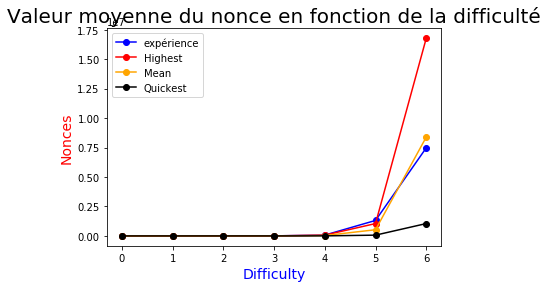

In [8]:
fig,ax=plt.subplots()
ax.plot(np.arange(max_diff+1),D_Moyenne,marker="o",color='blue')
ax.plot(np.arange(max_diff+1),Sur,marker="o",color='red')
ax.plot(np.arange(max_diff+1),Moy,marker="o",color='orange')
ax.plot(np.arange(max_diff+1),Rap,marker="o",color='black')
ax.set_title('Valeur moyenne du nonce en fonction de la difficulté',fontsize=20)
ax.legend(['expérience','Highest','Mean','Quickest'])
ax.set_xlabel("Difficulty",color="blue",fontsize=14)
ax.set_ylabel("Nonces",color="red",fontsize=14)

plt.show()

<p>la fonction de difficulté suit un fonction exponentielle f(x) = 16^x/2</p>

## 3) Démonstration que pour une Difficultée fixée, le temps de minage suit une loi exponentielle

### a) Mise en place des fonctions

In [44]:
# Retourne une Liste comprennant: une liste de temps mis pour un hash, une liste de hash, une liste de son nonce
def Package(previous_block,difficulty,nombre):
    Pack=[]
    L_T,L_H,L_N=Simulation(previous_block,difficulty,nombre)
    Pack.append([L_T,L_H,L_N])
    return Pack

In [45]:
# P(X>target)=p
# Retourne la probabilité où les valeurs sont supérieures à la target
def Exp(L_Temps,target):
    under=0
    for temps in L_Temps:
        if temps>target:
            under+=1
    return under/len(L_Temps)

### b) Application 

In [72]:
#Paramètres
nombre=500
previous_block=""

#Simulation de difficulté 0
Pack0 = Package(previous_block,0,nombre)
#Simulation de difficulté 1
Pack1 = Package(previous_block,1,nombre)
#Simulation de difficulté 2
Pack2 = Package(previous_block,2,nombre)
#Simulation de difficulté 3
Pack3 = Package(previous_block,3,nombre)
#Simulation de difficulté 4
Pack4 = Package(previous_block,4,nombre)

In [73]:
# Paramètres pour l'axe des abscisses
max_time=max(Pack4[0][0])+0.05

# Probabilités pour chaque difficulté
Y0_Exp=[]
Y1_Exp=[]
Y2_Exp=[]
Y3_Exp=[]
Y4_Exp=[]
X_axis=np.arange(0,max_time,0.01)
for target in X_axis:
    Y0_Exp.append(Exp(Pack0[0][0],target))
    Y1_Exp.append(Exp(Pack1[0][0],target))
    Y2_Exp.append(Exp(Pack2[0][0],target))
    Y3_Exp.append(Exp(Pack3[0][0],target))
    Y4_Exp.append(Exp(Pack4[0][0],target))

Text(0, 0.5, 'Proba')

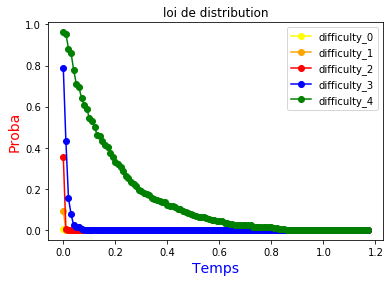

In [74]:
# Visualisation
fig,ax=plt.subplots()
plt.title('loi de distribution')
ax.plot(X_axis,Y0_Exp,marker="o",color='yellow')
ax.plot(X_axis,Y1_Exp,marker="o",color='orange')
ax.plot(X_axis,Y2_Exp,marker="o",color='red')
ax.plot(X_axis,Y3_Exp,marker="o",color='blue')
ax.plot(X_axis,Y4_Exp,marker="o",color='green')
ax.legend(['difficulty_0','difficulty_1','difficulty_2','difficulty_3','difficulty_4'])
ax.set_xlabel("Temps",color="blue",fontsize=14)
ax.set_ylabel("Proba",color="red",fontsize=14)

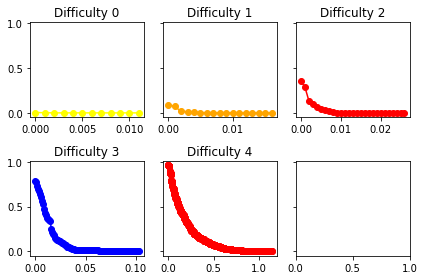

In [75]:
# Visualisation séparée

fig, ax = plt.subplots(2, 3,sharey=True)
#Plot Difficulty 0
Y0=[]
X0=np.arange(0,max(Pack0[0][0])+0.01,0.001)
for target in X0:
    Y0.append(Exp(Pack0[0][0],target))
ax[0,0].plot(X0,Y0,marker="o",color='yellow')
ax[0,0].set_title("Difficulty 0")

#Plot Difficulty 1
Y1=[]
X1=np.arange(0,max(Pack1[0][0])+0.01,0.001)
for target in X1:
    Y1.append(Exp(Pack1[0][0],target))
ax[0,1].plot(X1,Y1,marker="o",color='orange')
ax[0,1].set_title("Difficulty 1")

#Plot Difficulty 2
Y2=[]
X2=np.arange(0,max(Pack2[0][0])+0.01,0.001)
for target in X2:
    Y2.append(Exp(Pack2[0][0],target))
ax[0,2].plot(X2,Y2,marker="o",color='red')
ax[0,2].set_title("Difficulty 2")

#Plot Difficulty 3
Y3=[]
X3=np.arange(0,max(Pack3[0][0])+0.01,0.001)
for target in X3:
    Y3.append(Exp(Pack3[0][0],target))
ax[1,0].plot(X3,Y3,marker="o",color='blue')
ax[1,0].set_title("Difficulty 3")

#Plot Difficulty 4
Y4=[]
X4=np.arange(0,max(Pack4[0][0])+0.01,0.001)
for target in X4:
    Y4.append(Exp(Pack4[0][0],target))
ax[1,1].plot(X4,Y4,marker="o",color='red')
ax[1,1].set_title("Difficulty 4")

plt.tight_layout()
plt.show()

In [76]:
from scipy import stats
#montrer que la loi suit une loi exponentielle
print('### Observation du lien avec la loi exponentielle ###')
print('lien avec difficulté 0: ',stats.kstest(Y0_Exp,'expon'))
print('lien avec difficulté 1: ',stats.kstest(Y1_Exp,'expon'))
print('lien avec difficulté 2: ',stats.kstest(Y2_Exp,'expon'))
print('lien avec difficulté 3: ',stats.kstest(Y3_Exp,'expon'))
print('lien avec difficulté 4: ',stats.kstest(Y4_Exp,'expon'))

### Observation du lien avec la loi exponentielle ###
lien avec difficulté 0:  KstestResult(statistic=0.9960079893439915, pvalue=1.744414303788266e-283)
lien avec difficulté 1:  KstestResult(statistic=0.9915254237288136, pvalue=6.591027649842133e-245)
lien avec difficulté 2:  KstestResult(statistic=0.9875334130728051, pvalue=3.974140456662788e-225)
lien avec difficulté 3:  KstestResult(statistic=0.9443419299664643, pvalue=1.876525088083122e-148)
lien avec difficulté 4:  KstestResult(statistic=0.5795441566272757, pvalue=3.905994024865898e-38)


<p>On observe bien la loi exponentielle car le lien avec la loi est supérieure à 50%</p>

## 3) Applications

### a) Paramétrage pour une Application

In [17]:
#Paramètres donnés par l'utilisateur
Previous = str(input('Le Hash du block précédent: '))
Difficulty = eval(input('La difficulté: '))
Nombre = eval(input('le nombre de Simulation: '))

Le Hash du block précédent: 
La difficulté: 3
le nombre de Simulation: 2000


### b) Visualisation après avoir mis les paramètres

Text(0, 0.5, 'Proba')

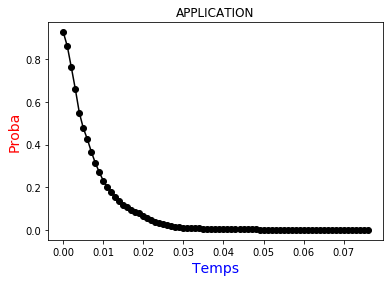

In [18]:
Application = Package(Previous,Difficulty,Nombre)
Y=[]
X = np.arange(0,max(Application[0][0])+0.01,0.001)
for target in X:
    Y.append(Exp(Application[0][0],target))
fig,ax=plt.subplots()
plt.title('APPLICATION')
ax.plot(X,Y,marker="o",color='black')
ax.set_xlabel("Temps",color="blue",fontsize=14)
ax.set_ylabel("Proba",color="red",fontsize=14)

In [19]:
def intersectionHorizontal(Y,Proba):
    value = [i for i in Y if i < Proba][0]
    return Y.index(value)

Donner la Probabilité: 0.2
Pour une Probabilité de 0.2 il faut 0.012 secondes!


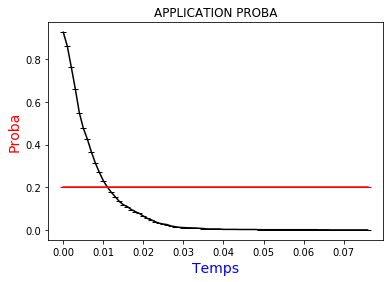

In [20]:
#Chercher un Temps spécifique
Proba = eval(input('Donner la Probabilité: '))
Y_Proba=[Proba]*len(X)

fig,ax=plt.subplots()
plt.title('APPLICATION PROBA')
ax.plot(X,Y,marker="_",color='black')
ax.plot(X,Y_Proba,marker="_",color='red')
ax.set_xlabel("Temps",color="blue",fontsize=14)
ax.set_ylabel("Proba",color="red",fontsize=14)

idxH = intersectionHorizontal(Y,Proba)
print('Pour une Probabilité de '+str(Proba)+' il faut '+str(X[idxH])+' secondes!')

In [21]:
def intersectionVertical(X,Temps):
    value = [i for i in X if Temps < i][0]
    return np.where(X == value)[0][0]

In [22]:
#Chercher une proba spécifique
Temps = eval(input('Donner le Temps: '))
idxV = intersectionVertical(X,Temps)
print('Pour un temps de '+str(Temps)+' on a '+str(Y[idxV])+' en probabilité!')

Donner le Temps: 0.03
Pour un temps de 0.03 on a 0.01 en probabilité!


<h1><center>Fin Du TD</center></h1>